# Library Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import average_precision_score, make_scorer, recall_score
import statsmodels.api as sm

In [2]:
os.chdir('Datasets')

In [3]:
data_old = pd.read_excel('CreditWorthiness.xlsx', sheet_name = 'Data')

# Data Preprocessing & Cleaning

In [4]:
data_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Cbal           1000 non-null object
Cdur           1000 non-null int64
Chist          1000 non-null object
Cpur           1000 non-null object
Camt           1000 non-null int64
Sbal           1000 non-null object
Edur           1000 non-null object
InRate         1000 non-null int64
MSG            1000 non-null object
Oparties       1000 non-null object
Rdur           1000 non-null object
Prop           1000 non-null object
age            1000 non-null int64
inPlans        1000 non-null object
Htype          1000 non-null object
NumCred        1000 non-null int64
JobType        1000 non-null object
Ndepend        1000 non-null int64
telephone      1000 non-null object
foreign        1000 non-null object
creditScore    1000 non-null object
dtypes: int64(6), object(15)
memory usage: 164.2+ KB


In [5]:
data_old.isnull().sum(axis = 0) #There are no NULL values

Cbal           0
Cdur           0
Chist          0
Cpur           0
Camt           0
Sbal           0
Edur           0
InRate         0
MSG            0
Oparties       0
Rdur           0
Prop           0
age            0
inPlans        0
Htype          0
NumCred        0
JobType        0
Ndepend        0
telephone      0
foreign        0
creditScore    0
dtype: int64

In [6]:
data = data_old.copy(deep = True)

In [7]:
features = list(data.columns)
print(features)

['Cbal', 'Cdur', 'Chist', 'Cpur', 'Camt', 'Sbal', 'Edur', 'InRate', 'MSG', 'Oparties', 'Rdur', 'Prop', 'age', 'inPlans', 'Htype', 'NumCred', 'JobType', 'Ndepend', 'telephone', 'foreign', 'creditScore']


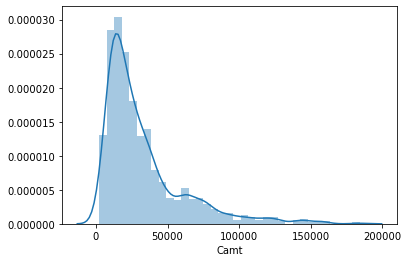

In [8]:
sns.distplot(data.Camt)

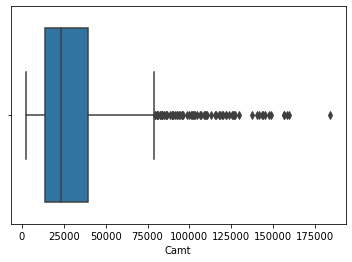

In [9]:
sns.boxplot(data.Camt)

In [10]:
data['Camt'] = np.log(data['Camt'])  #Log transformation to obtain a normal distribution of data

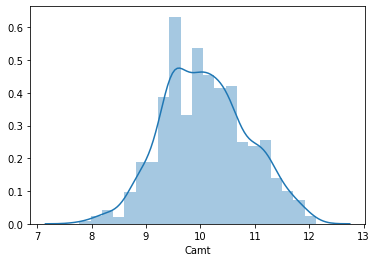

In [11]:
sns.distplot(data.Camt)

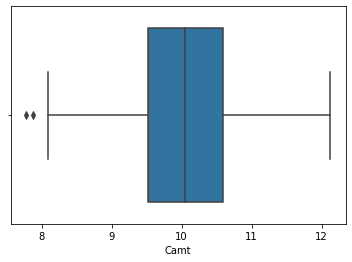

In [12]:
sns.boxplot(data.Camt)

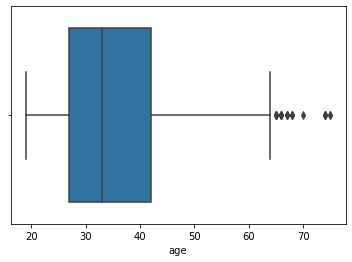

In [13]:
sns.boxplot(data.age)

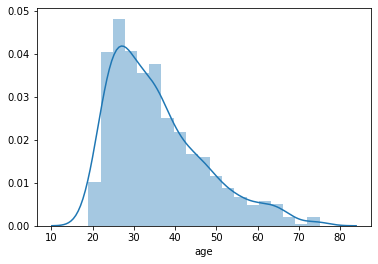

In [14]:
sns.distplot(data.age)

Text(0.5, 1.0, 'Camt')

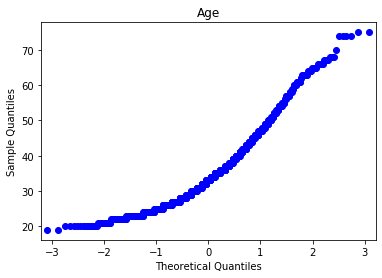

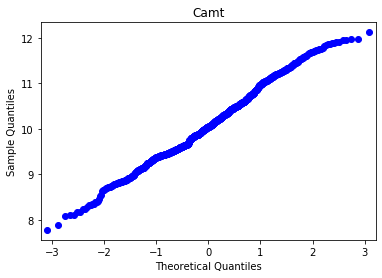

In [15]:
sm.qqplot(data.age) #There seems to be a slight curve with age.
plt.title("Age")
sm.qqplot(data.Camt) #Camt is normally distributed
plt.title("Camt")

In [16]:
#Categorizing the Cbal column appropriately into 4 groups
data['Cbal'] = data.Cbal.replace("no checking account", 0)
data['Cbal'] = data.Cbal.replace("0 <= Rs. < 2000", 1)
data['Cbal'] = data.Cbal.replace(" Rs. < 0", -1)
data['Cbal'] = data.Cbal.replace("Rs. >=2000", 2)

In [17]:
data['Cbal'].value_counts()

 0    394
-1    274
 1    269
 2     63
Name: Cbal, dtype: int64

In [18]:
#Categorizing the Chist column appropriately into 2 groups
data['Chist'] = data.Chist.replace("all settled till now", 0)
data['Chist'] = data.Chist.replace("all settled", 0)
data['Chist'] = data.Chist.replace("none taken/all settled", 0)
data['Chist'] = data.Chist.replace("dues not paid earlier", -1)

In [19]:
data['Chist'].value_counts()

 0    707
-1    293
Name: Chist, dtype: int64

In [20]:
#Categorizing the Sbal column appropriately into 5 groups
data['Sbal'] = data.Sbal.replace("no savings account", 0)
data['Sbal'] = data.Sbal.replace("Rs. < 1000", 500) #mean of 0 and 1000
data['Sbal'] = data.Sbal.replace("1000 <= Rs. < 5,000", 3000) #mean of 1000 and 5000
data['Sbal'] = data.Sbal.replace("5000 <= Rs. < 10,000", 7500)
data['Sbal'] = data.Sbal.replace("Rs. >= 10,000", 10000)

In [21]:
data['Sbal'].value_counts()

500      603
0        183
3000     103
7500      63
10000     48
Name: Sbal, dtype: int64

In [22]:
data['Oparties'].value_counts()

no one               907
yes, guarantor        52
yes, co-applicant     41
Name: Oparties, dtype: int64

In [23]:
#Categorizing the Oparties column appropriately into 2 groups
data['Oparties'] = data.Oparties.replace("no one", 0)
data['Oparties'] = data.Oparties.replace("yes, guarantor", 1)
data['Oparties'] = data.Oparties.replace("yes, co-applicant", 1)

In [24]:
data['Oparties'].value_counts()

0    907
1     93
Name: Oparties, dtype: int64

In [25]:
data['JobType'].value_counts()

employee with official position                            630
resident unskilled                                         200
employed either in management, self or in high position    148
non resident either unemployed or  unskilled                22
Name: JobType, dtype: int64

In [26]:
#Reducing the no. of categories in JobType
data['JobType'] = data.JobType.replace("employee with official position", "skilled employee")
data['JobType'] = data.JobType.replace("employed either in management, self or in high position", "skilled employee")
data['JobType'] = data.JobType.replace("non resident either unemployed or  unskilled ", "unskilled employee")
data['JobType'] = data.JobType.replace("resident unskilled", "unskilled employee")

In [27]:
data['JobType'].value_counts()

skilled employee      778
unskilled employee    222
Name: JobType, dtype: int64

In [28]:
data['foreign'].value_counts() #isn't very useful, since there are only 37 records that are different out of 1000.

no     963
yes     37
Name: foreign, dtype: int64

In [29]:
data['creditScore'].value_counts()

good    700
bad     300
Name: creditScore, dtype: int64

In [30]:
#Categorizing creditScore column appropriately for classification
data['creditScore'] = data.creditScore.replace("good", 1)
data['creditScore'] = data.creditScore.replace("bad", 0)

In [31]:
data['creditScore'].value_counts()

1    700
0    300
Name: creditScore, dtype: int64

In [32]:
data['inPlans'].value_counts()

none      814
bank      139
stores     47
Name: inPlans, dtype: int64

In [33]:
#Categorizing inPlans into 2 values, appropriately
data['inPlans'] = data.inPlans.replace("none", 0)
data['inPlans'] = data.inPlans.replace("bank", 1)
data['inPlans'] = data.inPlans.replace("stores", 1)

In [34]:
data['inPlans'].value_counts()

0    814
1    186
Name: inPlans, dtype: int64

In [35]:
data['Cpur'].value_counts()

electronics            280
second hand vehicle    234
furniture              181
new vehicle            103
Business                97
education               50
renovation              22
domestic needs          12
miscellaneous           12
retaining                9
Name: Cpur, dtype: int64

In [36]:
#Using domain knowledge to reduce no. of different categories for Cpur
#Grouping second hand vehicle and new vehicle to vehicle
#Grouping furniture, domestic needs and renovation to domestic
#Grouping retaining and miscallenous into miscallenous
data['Cpur'] = data.Cpur.replace("second hand vehicle", "vehicle")
data['Cpur'] = data.Cpur.replace("new vehicle", "vehicle")
data['Cpur'] = data.Cpur.replace("furniture", "domestic")
data['Cpur'] = data.Cpur.replace("domestic needs", "domestic")
data['Cpur'] = data.Cpur.replace("renovation", "domestic")
data['Cpur'] = data.Cpur.replace("retaining", "miscellaneous")
data['Cpur'] = data.Cpur.replace("education", "miscellaneous")

In [37]:
data['Cpur'].value_counts()

vehicle          337
electronics      280
domestic         215
Business          97
miscellaneous     71
Name: Cpur, dtype: int64

In [38]:
#Dropping unnecessary columns, as they do not give much significance
dropped_columns = ['foreign', 'telephone', 'Rdur', 'MSG', 'Prop']

#Reasoning:
    #foreign has only 37/1000 different records
    #telephone does not give much inference from a domain knowledge point of view
    #residence duration has been avoided for the same reason
    #MSG and Ndepend are corelated
    #Prop has been excluded because the ML model does not improve with its inclusion

In [39]:
data = data.drop(dropped_columns, axis = 1)

In [40]:
features = list(data.columns)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
Cbal           1000 non-null int64
Cdur           1000 non-null int64
Chist          1000 non-null int64
Cpur           1000 non-null object
Camt           1000 non-null float64
Sbal           1000 non-null int64
Edur           1000 non-null object
InRate         1000 non-null int64
Oparties       1000 non-null int64
age            1000 non-null int64
inPlans        1000 non-null int64
Htype          1000 non-null object
NumCred        1000 non-null int64
JobType        1000 non-null object
Ndepend        1000 non-null int64
creditScore    1000 non-null int64
dtypes: float64(1), int64(11), object(4)
memory usage: 125.1+ KB


In [42]:
data.describe()

,Cbal,Cdur,Chist,Camt,Sbal,InRate,Oparties,age,inPlans,NumCred,Ndepend,creditScore
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.121000,20.903000,-0.293000,10.084606,1563.000000,2.973000,0.093000,35.546000,0.186000,1.407000,1.155000,0.700000
std,0.883821,12.058814,0.455366,0.781331,2643.012773,1.118715,0.290578,11.375469,0.389301,0.577654,0.362086,0.458487
min,-1.000000,4.000000,-1.000000,7.774856,0.000000,1.000000,0.000000,19.000000,0.000000,1.000000,1.000000,0.000000
25%,-1.000000,12.000000,-1.000000,9.513034,500.000000,2.000000,0.000000,27.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,18.000000,0.000000,10.046505,500.000000,3.000000,0.000000,33.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,24.000000,0.000000,10.586648,500.000000,4.000000,0.000000,42.000000,0.000000,2.000000,1.000000,1.000000
max,2.000000,72.000000,0.000000,12.123343,10000.000000,4.000000,1.000000,75.000000,1.000000,4.000000,2.000000,1.000000


# Inferential Statistics

In [43]:
cor = data.corr()
print(cor)

                 Cbal      Cdur     Chist      Camt      Sbal    InRate  \
Cbal         1.000000 -0.008384  0.028486 -0.002982  0.075367 -0.072622   
Cdur        -0.008384  1.000000  0.075575  0.640382 -0.053389  0.074749   
Chist        0.028486  0.075575  1.000000  0.025888 -0.016253 -0.041089   
Camt        -0.002982  0.640382  0.025888  1.000000 -0.092988 -0.303239   
Sbal         0.075367 -0.053389 -0.016253 -0.092988  1.000000  0.005993   
InRate      -0.072622  0.074749 -0.041089 -0.303239  0.005993  1.000000   
Oparties    -0.032168 -0.009993  0.017014  0.004674 -0.091053 -0.013823   
age         -0.012950 -0.036136 -0.163681  0.011575  0.017200  0.058266   
inPlans      0.010165  0.067602  0.070571  0.032433  0.002706  0.016139   
NumCred     -0.033815 -0.011284 -0.501364  0.020313 -0.013861  0.021669   
Ndepend     -0.068048 -0.023834 -0.021765  0.037631 -0.012306 -0.071207   
creditScore  0.094611 -0.214927 -0.181713 -0.109347  0.095740 -0.072404   

             Oparties   

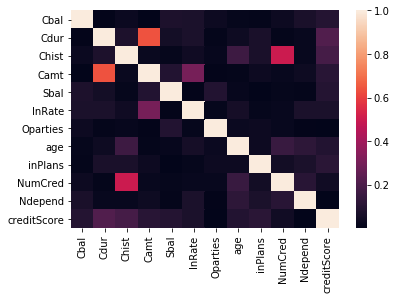

In [44]:
sns.heatmap(np.abs(cor), xticklabels = cor.columns, yticklabels = cor.columns)
plt.show()

#Camt and Cdur
#NumCred and Chist

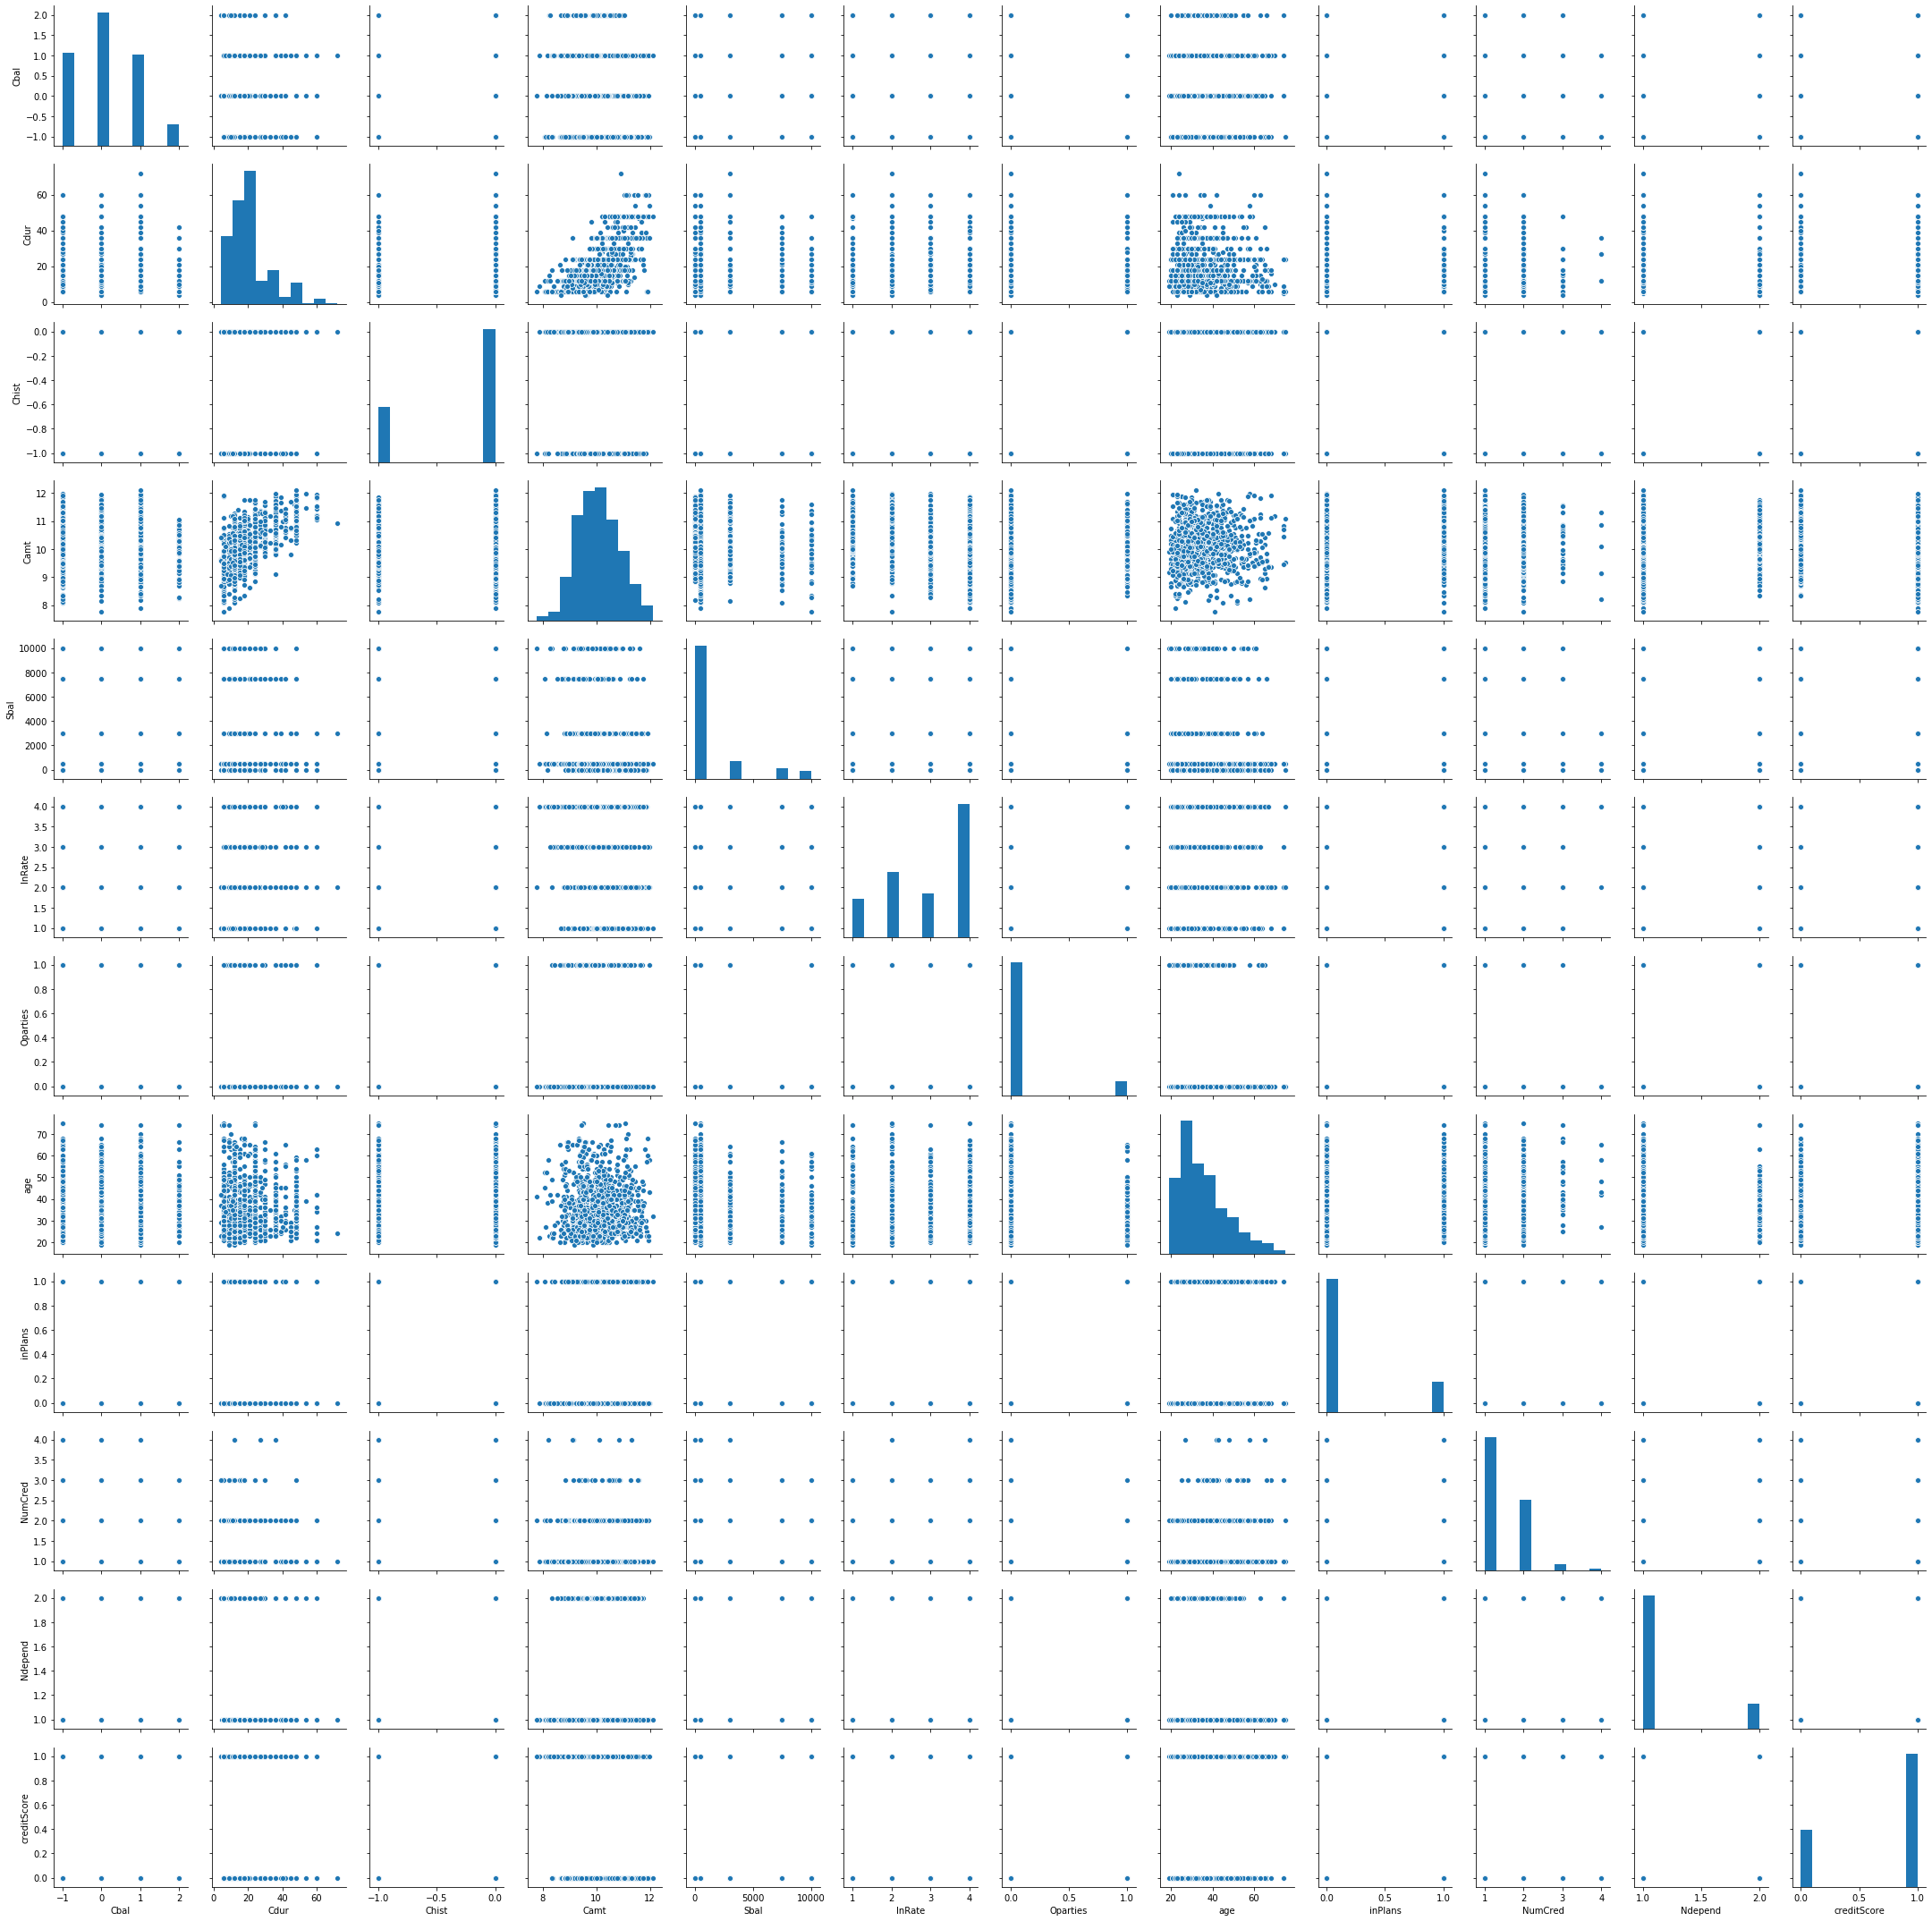

In [45]:
sns.pairplot(data)
plt.show()

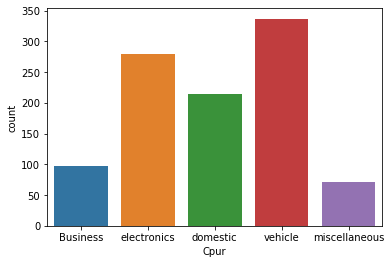

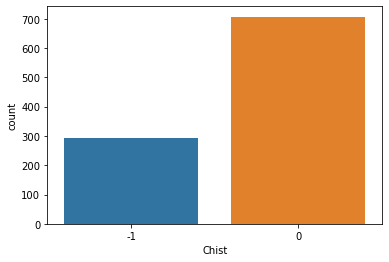

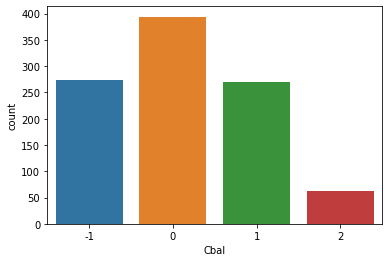

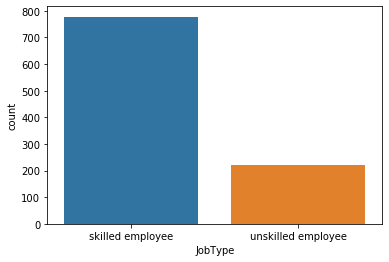

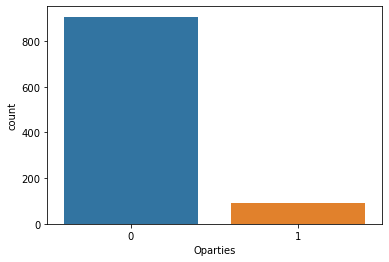

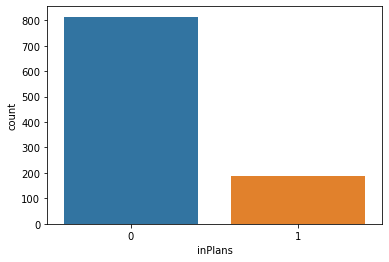

In [46]:
sns.countplot(x = 'Cpur', data = data)
plt.show()
sns.countplot(x = 'Chist', data = data)
plt.show()
sns.countplot(x = 'Cbal', data = data)
plt.show()
sns.countplot(x = 'JobType', data = data)
plt.show()
sns.countplot(x = 'Oparties', data = data)
plt.show()
sns.countplot(x = 'inPlans', data = data)
plt.show()

# Building a Machine Learning Model

In [47]:
new_data = pd.get_dummies(data, drop_first = True)

In [48]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
Cbal                          1000 non-null int64
Cdur                          1000 non-null int64
Chist                         1000 non-null int64
Camt                          1000 non-null float64
Sbal                          1000 non-null int64
InRate                        1000 non-null int64
Oparties                      1000 non-null int64
age                           1000 non-null int64
inPlans                       1000 non-null int64
NumCred                       1000 non-null int64
Ndepend                       1000 non-null int64
creditScore                   1000 non-null int64
Cpur_domestic                 1000 non-null uint8
Cpur_electronics              1000 non-null uint8
Cpur_miscellaneous            1000 non-null uint8
Cpur_vehicle                  1000 non-null uint8
Edur_4 to 7 years             1000 non-null uint8
Edur_less than 1 year         1000 non-nul

In [49]:
new_data.describe()

,Cbal,Cdur,Chist,Camt,Sbal,InRate,Oparties,age,inPlans,NumCred,...,Cpur_electronics,Cpur_miscellaneous,Cpur_vehicle,Edur_4 to 7 years,Edur_less than 1 year,Edur_more than 7 years,Edur_not employed,Htype_own,Htype_pays rent,JobType_unskilled employee
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.121000,20.903000,-0.293000,10.084606,1563.000000,2.973000,0.093000,35.546000,0.186000,1.407000,...,0.280000,0.071000,0.337000,0.174000,0.172000,0.253000,0.062000,0.713000,0.179000,0.222000
std,0.883821,12.058814,0.455366,0.781331,2643.012773,1.118715,0.290578,11.375469,0.389301,0.577654,...,0.449224,0.256953,0.472921,0.379299,0.377569,0.434948,0.241276,0.452588,0.383544,0.415799
min,-1.000000,4.000000,-1.000000,7.774856,0.000000,1.000000,0.000000,19.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,12.000000,-1.000000,9.513034,500.000000,2.000000,0.000000,27.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,18.000000,0.000000,10.046505,500.000000,3.000000,0.000000,33.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,24.000000,0.000000,10.586648,500.000000,4.000000,0.000000,42.000000,0.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,72.000000,0.000000,12.123343,10000.000000,4.000000,1.000000,75.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
y1 = new_data.creditScore
x1 = new_data.drop(['creditScore'], axis = 'columns', inplace = False)
print(x1.shape, y1.shape)

(1000, 22) (1000,)


In [51]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x1, y1, test_size = 0.3, random_state = 3)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(700, 22) (700,) (300, 22) (300,)


## Logistic Regression

In [52]:
#Running a Logistic Regression Model on the data

logistic = LogisticRegression()

logistic.fit(x_train, y_train)

pred = logistic.predict(x_test)

conf_mat = confusion_matrix(y_test, pred)
print(conf_mat, end ="\n\n")

acc = accuracy_score(y_test, pred)
print("Accuracy : ",acc, end ="\n\n")

print('Misclassified Samples %d' %(y_test != pred).sum())

[[ 23  74]
 [  7 196]]

Accuracy :  0.73

Misclassified Samples 81


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
print(logistic.coef_)
print(logistic.intercept_)

[[ 1.88571854e-01 -3.91029537e-02 -6.16104919e-01  1.07693052e-01
   8.32322643e-05 -3.64350210e-02  1.49606644e-02  6.92602899e-03
  -3.46943526e-01 -5.57363873e-03  2.57926783e-02 -1.83101288e-02
   3.36537798e-01 -1.78333077e-01 -1.47853304e-01  4.37474428e-01
  -2.98978932e-01  1.78088700e-01 -1.55656091e-01  3.56243468e-01
  -1.48976234e-01 -1.61212507e-01]]
[0.01860772]


## Random Forest Classification

In [54]:
#Random Forest Classifier

rf = sklearn.ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 210)
model_rf1 = rf.fit(x_train, y_train)

rf1_pred = rf.predict(x_test)

conf_mat = confusion_matrix(y_test, rf1_pred)
print(conf_mat, end ="\n\n")

acc = accuracy_score(y_test, rf1_pred)
print("Accuracy : ",acc, end ="\n\n")

print('Misclassified Samples %d' %(y_test != rf1_pred).sum())

[[ 44  53]
 [ 18 185]]

Accuracy :  0.7633333333333333

Misclassified Samples 71


In [55]:
#Hyperparameter Tuning for Random Forest Classifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 1000)]

max_depth = [int(x) for x in np.linspace(10, 1000, num = 1000)]

randomgrid = {'n_estimators':n_estimators, 'max_depth': max_depth}

In [74]:
rf_for_tuning = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_for_tuning, param_distributions = randomgrid, n_iter = 100, cv = 3, verbose = 2, random_state = 1)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=46, max_depth=136 ..................................
[CV] ................... n_estimators=46, max_depth=136, total=   0.2s
[CV] n_estimators=46, max_depth=136 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... n_estimators=46, max_depth=136, total=   0.2s
[CV] n_estimators=46, max_depth=136 ..................................
[CV] ................... n_estimators=46, max_depth=136, total=   0.2s
[CV] n_estimators=758, max_depth=496 .................................
[CV] .................. n_estimators=758, max_depth=496, total=   2.9s
[CV] n_estimators=758, max_depth=496 .................................
[CV] .................. n_estimators=758, max_depth=496, total=   2.9s
[CV] n_estimators=758, max_depth=496 .................................
[CV] .................. n_estimators=758, max_depth=496, total=   2.9s
[CV] n_estimators=925, max_depth=475 .................................
[CV] .................. n_estimators=925, max_depth=475, total=   3.8s
[CV] n_estimators=925, max_depth=475 .................................
[CV] .................. n_estimators=925, max_depth=475, total=   3.7s
[CV] n_estimators=925, max_depth=475 .................................
[CV] .

[CV] .................. n_estimators=490, max_depth=184, total=   1.9s
[CV] n_estimators=99, max_depth=694 ..................................
[CV] ................... n_estimators=99, max_depth=694, total=   0.4s
[CV] n_estimators=99, max_depth=694 ..................................
[CV] ................... n_estimators=99, max_depth=694, total=   0.4s
[CV] n_estimators=99, max_depth=694 ..................................
[CV] ................... n_estimators=99, max_depth=694, total=   0.4s
[CV] n_estimators=957, max_depth=579 .................................
[CV] .................. n_estimators=957, max_depth=579, total=   3.8s
[CV] n_estimators=957, max_depth=579 .................................
[CV] .................. n_estimators=957, max_depth=579, total=   3.7s
[CV] n_estimators=957, max_depth=579 .................................
[CV] .................. n_estimators=957, max_depth=579, total=   3.7s
[CV] n_estimators=615, max_depth=462 .................................
[CV] .

[CV] .................. n_estimators=341, max_depth=108, total=   1.4s
[CV] n_estimators=341, max_depth=108 .................................
[CV] .................. n_estimators=341, max_depth=108, total=   1.4s
[CV] n_estimators=341, max_depth=108 .................................
[CV] .................. n_estimators=341, max_depth=108, total=   1.3s
[CV] n_estimators=619, max_depth=825 .................................
[CV] .................. n_estimators=619, max_depth=825, total=   2.5s
[CV] n_estimators=619, max_depth=825 .................................
[CV] .................. n_estimators=619, max_depth=825, total=   2.4s
[CV] n_estimators=619, max_depth=825 .................................
[CV] .................. n_estimators=619, max_depth=825, total=   2.5s
[CV] n_estimators=569, max_depth=125 .................................
[CV] .................. n_estimators=569, max_depth=125, total=   2.2s
[CV] n_estimators=569, max_depth=125 .................................
[CV] .

[CV] .................. n_estimators=784, max_depth=108, total=   3.0s
[CV] n_estimators=784, max_depth=108 .................................
[CV] .................. n_estimators=784, max_depth=108, total=   3.2s
[CV] n_estimators=569, max_depth=545 .................................
[CV] .................. n_estimators=569, max_depth=545, total=   2.2s
[CV] n_estimators=569, max_depth=545 .................................
[CV] .................. n_estimators=569, max_depth=545, total=   2.2s
[CV] n_estimators=569, max_depth=545 .................................
[CV] .................. n_estimators=569, max_depth=545, total=   2.2s
[CV] n_estimators=343, max_depth=719 .................................
[CV] .................. n_estimators=343, max_depth=719, total=   1.3s
[CV] n_estimators=343, max_depth=719 .................................
[CV] .................. n_estimators=343, max_depth=719, total=   1.4s
[CV] n_estimators=343, max_depth=719 .................................
[CV] .

[CV] .................. n_estimators=532, max_depth=735, total=   2.1s
[CV] n_estimators=741, max_depth=390 .................................
[CV] .................. n_estimators=741, max_depth=390, total=   2.8s
[CV] n_estimators=741, max_depth=390 .................................
[CV] .................. n_estimators=741, max_depth=390, total=   2.9s
[CV] n_estimators=741, max_depth=390 .................................
[CV] .................. n_estimators=741, max_depth=390, total=   3.3s
[CV] n_estimators=294, max_depth=932 .................................
[CV] .................. n_estimators=294, max_depth=932, total=   1.1s
[CV] n_estimators=294, max_depth=932 .................................
[CV] .................. n_estimators=294, max_depth=932, total=   1.1s
[CV] n_estimators=294, max_depth=932 .................................
[CV] .................. n_estimators=294, max_depth=932, total=   1.2s
[CV] n_estimators=96, max_depth=864 ..................................
[CV] .

[CV] .................. n_estimators=120, max_depth=214, total=   0.5s
[CV] n_estimators=120, max_depth=214 .................................
[CV] .................. n_estimators=120, max_depth=214, total=   0.5s
[CV] n_estimators=120, max_depth=214 .................................
[CV] .................. n_estimators=120, max_depth=214, total=   0.5s
[CV] n_estimators=107, max_depth=715 .................................
[CV] .................. n_estimators=107, max_depth=715, total=   0.4s
[CV] n_estimators=107, max_depth=715 .................................
[CV] .................. n_estimators=107, max_depth=715, total=   0.4s
[CV] n_estimators=107, max_depth=715 .................................
[CV] .................. n_estimators=107, max_depth=715, total=   0.4s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  8.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [75]:
print(rf_random.best_params_)

{'n_estimators': 793, 'max_depth': 659}


In [76]:
rf1_pred = rf_random.predict(x_test)

conf_mat = confusion_matrix(y_test, rf1_pred)
print(conf_mat, end ="\n\n")

acc = accuracy_score(y_test, rf1_pred)
print("Accuracy : ",acc, end ="\n\n")

print('Misclassified Samples %d' %(y_test != rf1_pred).sum())

[[ 35  62]
 [ 12 191]]

Accuracy :  0.7533333333333333

Misclassified Samples 74


## SVM

### Scaling

In [77]:
sc=StandardScaler()
train_x = sc.fit_transform(x_train)
test_x = sc.transform(x_test)

In [78]:
#Perform Classification using Linear SVM

lsvc = LinearSVC(random_state=0,C=10,max_iter=100000) 
lsvc.fit(train_x, y_train) 
train_yp = lsvc.predict(train_x) 
test_yp = lsvc.predict(test_x)  

In [79]:
def evaluate(yt,yp):
    cf = confusion_matrix(yt,yp) 
    acc=accuracy_score(yt,yp) 
    return cf,acc


def display(yt,yp,model):
    cf,acc = evaluate(yt,yp)
    print('Model: ',model,'\ncf=',cf,'\n', '\nacc=',acc,'%\n')

In [80]:
display(y_train,train_yp,'Linear SVC - Validation')
display(y_test,test_yp,'Linear SVC - Testing')

Model:  Linear SVC - Validation 
cf= [[ 36 167]
 [ 25 472]] 
 
acc= 0.7257142857142858 %

Model:  Linear SVC - Testing 
cf= [[ 19  78]
 [  7 196]] 
 
acc= 0.7166666666666667 %



In [63]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(train_x, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.714, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.714, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.707, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.707, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.707, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.736, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.736, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.750, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.729, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.650, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.714, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.714, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.729, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.650, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.714, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.714, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.707, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.707, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.707, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [64]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [65]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
grid_predictions = grid.predict(test_x)

In [67]:
print(confusion_matrix(y_test,grid_predictions))

[[ 22  75]
 [ 12 191]]


In [68]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.65      0.23      0.34        97
           1       0.72      0.94      0.81       203

    accuracy                           0.71       300
   macro avg       0.68      0.58      0.58       300
weighted avg       0.70      0.71      0.66       300



## MLP Classifier

In [69]:
#Perform Classification using MLP Classifier

mlpc = MLPClassifier(hidden_layer_sizes=1, activation='tanh', learning_rate='invscaling', max_iter=100000, solver='sgd', random_state=1, early_stopping=True) 
mlpc.fit(train_x, y_train)
train_yp=mlpc.predict(train_x)
test_yp=mlpc.predict(test_x) 

In [70]:
display(y_train,train_yp,'MLP: Training')
display(y_test,test_yp,'MLP: Testing')

Model:  MLP: Training 
cf= [[  0 203]
 [  0 497]] 
 
acc= 0.71 %

Model:  MLP: Testing 
cf= [[  0  97]
 [  0 203]] 
 
acc= 0.6766666666666666 %

